In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp

In [3]:
df = pd.read_csv('heart.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

In [ ]:
# https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

# Data Info

In [3]:
# Check for missing values
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [6]:
df.shape

(918, 12)

# Exploratory Data Analysis

In [3]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


In [7]:
# Label Encodings : Df_transformed is for correlation and other operations where numeric features are supported

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_transformed = df.copy(deep = True)

df_transformed['Sex'] = le.fit_transform(df_transformed['Sex'])
df_transformed['ChestPainType'] = le.fit_transform(df_transformed['ChestPainType'])
df_transformed['RestingECG'] = le.fit_transform(df_transformed['RestingECG'])
df_transformed['ExerciseAngina'] = le.fit_transform(df_transformed['ExerciseAngina'])
df_transformed['ST_Slope'] = le.fit_transform(df_transformed['ST_Slope'])
df_transformed

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [36]:
import plotly.express as px
import plotly.graph_objects as go

# Assuming you have a dataframe named 'df_transformed'
corr = df_transformed.corr()

# Create a custom diverging colormap
colorscale = [[0.0, 'rgb(59,76,192)'],
              [0.25, 'rgb(140,210,225)'],
              [0.5, 'rgb(255,255,255)'],
              [0.75, 'rgb(253,183,94)'],
              [1.0, 'rgb(180,4,38)']]

# Reverse the order of y-axis to flip the diagonal
heatmap = go.Heatmap(
    z=corr.values[::-1],  # Reverse the order of rows
    x=corr.columns,
    y=corr.columns[::-1],  # Reverse the order of columns
    colorscale=colorscale,
    zmin=-1,
    zmax=1,
    colorbar=dict(title="Correlation", thickness=20, ticklen=4, len=0.8),
    text=corr.values[::-1],  # Reverse the order of rows for annotations
    texttemplate="%{text:.2f}",
    textfont={"size": 10},
    showscale=True
)

# Create the layout
layout = go.Layout(
    title={
        'text': "Correlation Matrix",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'family': 'Arial', 'color': 'black'}
    },
    xaxis=dict(tickangle=45, tickfont=dict(size=12)),
    yaxis=dict(tickfont=dict(size=12)),
    width=800,
    height=800,
    autosize=False,
    margin=dict(l=80, r=80, t=100, b=80),
)

# Create the figure
fig = go.Figure(data=[heatmap], layout=layout)

# Show the figure
fig.show()


In [34]:
import plotly.express as px

# Create the histogram
fig = px.histogram(
    df,
    x="HeartDisease",
    color="Sex",
    hover_data=df.columns,
    title="Distribution of Heart Diseases by Sex",
    barmode="group",
    category_orders={"Sex": ["Male", "Female"]},  # Ensure consistent ordering
    color_discrete_sequence=px.colors.carto.Bluyl,  # Use a more appealing color palette
)

# Update layout for better aesthetics
fig.update_layout(
    title={
        "text": "Distribution of Heart Diseases by Sex",
        "y": 0.9,
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
        "font": {"size": 24, "family": "Arial", "color": "black"},
    },
    xaxis_title="Heart Disease",
    yaxis_title="Count",
    legend_title="Sex",
    font=dict(size=14, family="Arial"),
    bargap=0.5,  # Adjust gap between bars
    template="plotly_white",  # Use a clean white background
    height=600,
    width=800,
)

# Update axes for better readability
fig.update_xaxes(tickangle=0, tickfont=dict(size=12), title_font=dict(size=18))
fig.update_yaxes(tickfont=dict(size=12), title_font=dict(size=18))

# Show the updated figure
fig.show()

In [53]:
import plotly.express as px

# Create the histogram
fig = px.histogram(
    df,
    x="ChestPainType",
    color="Sex",
    hover_data=df.columns,
    title="Types of Chest Pain by Sex",
    barmode="group",
    category_orders={"ChestPainType": ["TA", "ATA", "NAP", "ASY"]},  # Ensure consistent ordering if categories are known
    color_discrete_sequence=px.colors.colorbrewer.Set3  # Use a more appealing color palette
)

# Update layout for better aesthetics
fig.update_layout(
    title={
        'text': "Types of Chest Pain by Sex",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'family': 'Arial', 'color': 'black'}
    },
    xaxis_title="Chest Pain Type",
    yaxis_title="Count",
    legend_title="Sex",
    font=dict(size=14, family="Arial"),
    bargap=0.3,  # Adjust gap between bars
    template="plotly_white",  # Use a clean white background
    width=800,  # Fixed width
    height=600  # Fixed height
)

# Update axes for better readability
fig.update_xaxes(tickangle=45, tickfont=dict(size=12), title_font=dict(size=18))
fig.update_yaxes(tickfont=dict(size=12), title_font=dict(size=18))

# Add annotations for better insight
annotations = [
    dict(
        x=xi,
        y=yi,
        text=f"{yi}",
        xanchor='center',
        yanchor='bottom',
        showarrow=False,
        font=dict(size=12)
    ) for xi, yi in zip(df["ChestPainType"], df["Sex"].value_counts().values)
]

fig.update_layout(annotations=annotations)

# Show the updated figure
fig.show()


[]

<Figure size 1500x1000 with 0 Axes>

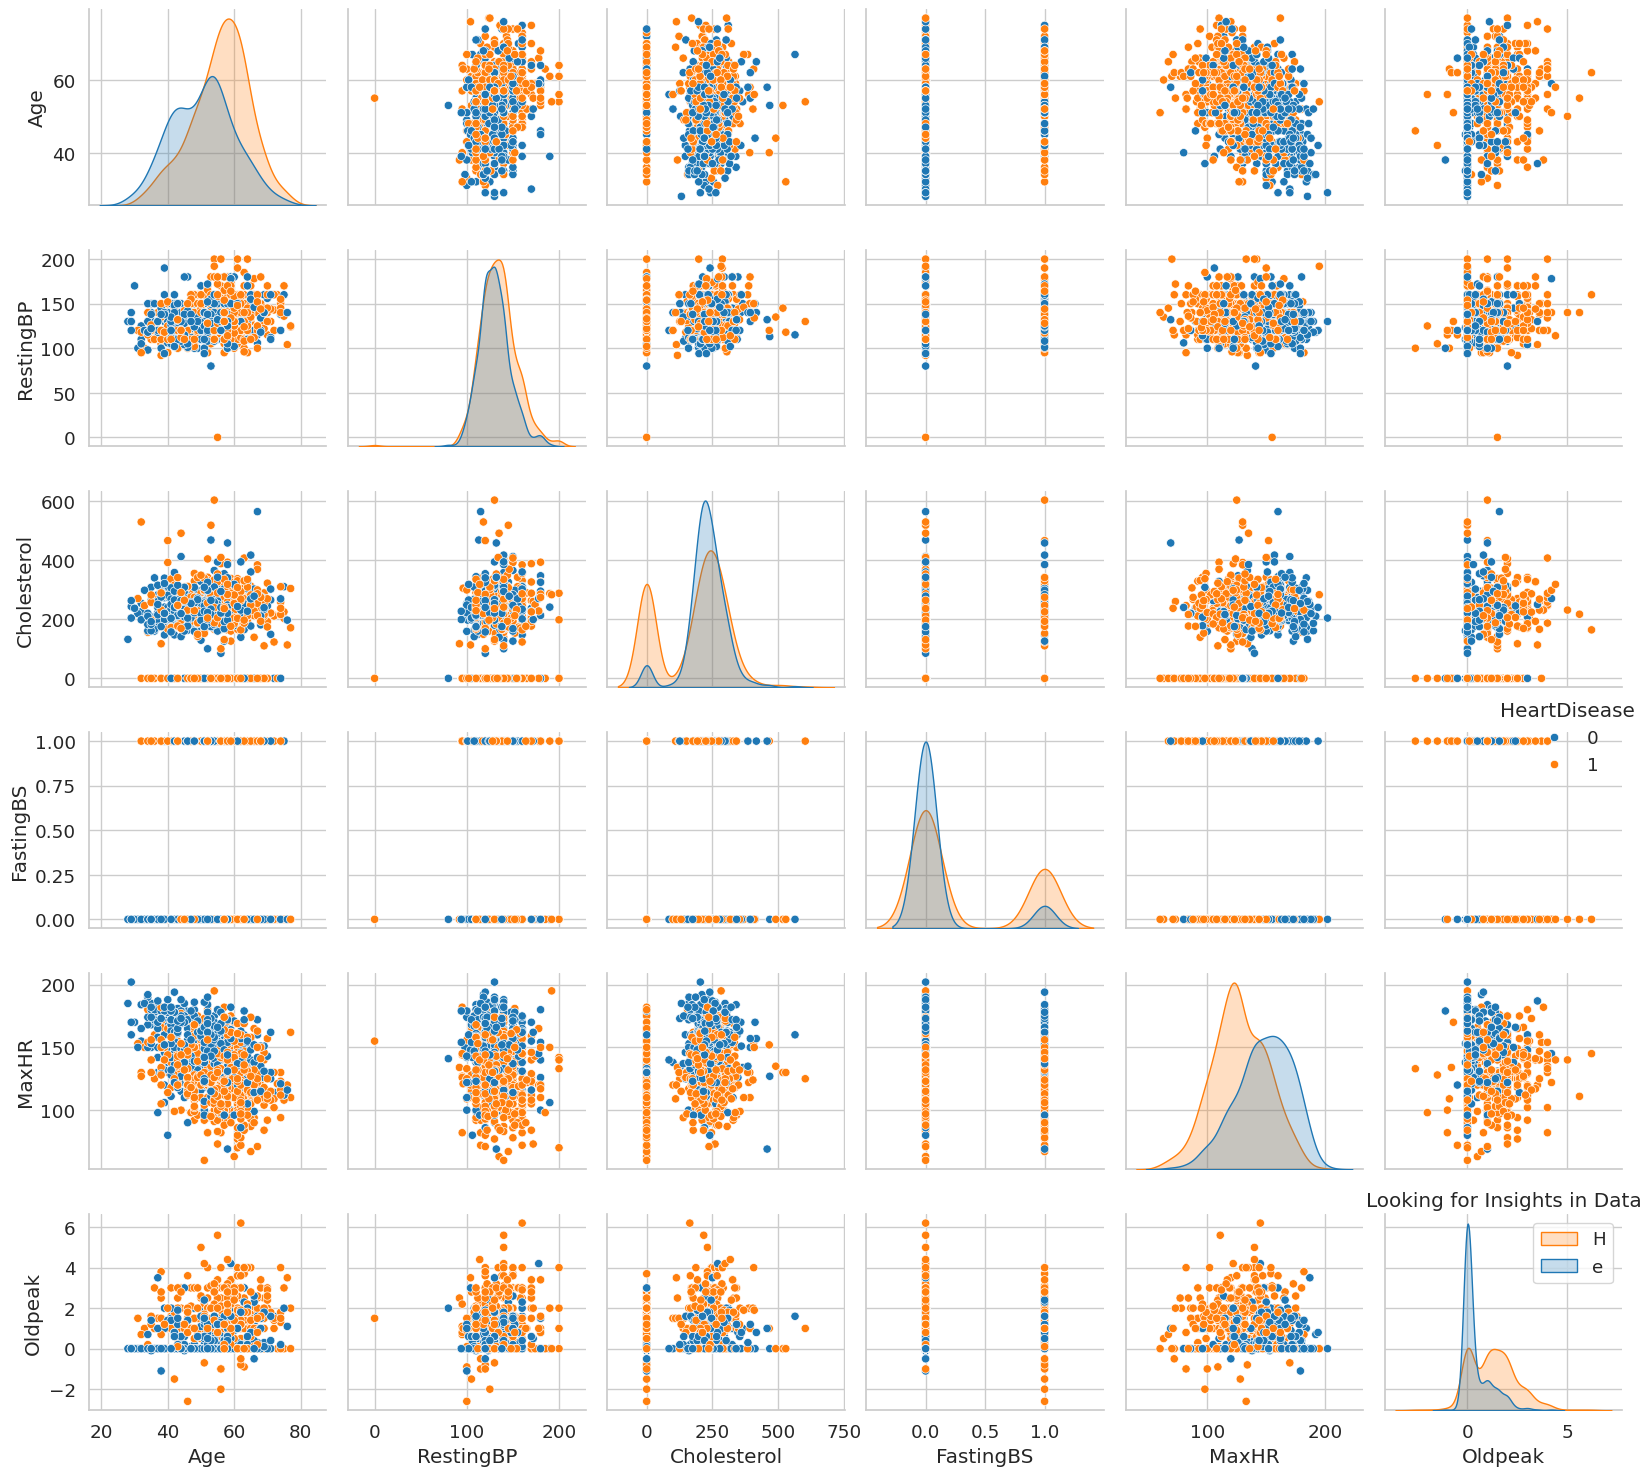

In [56]:
# pairplot

plt.figure(figsize=(15, 10))
sns.pairplot(df, hue="HeartDisease")
plt.title("Looking for Insights in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

In [92]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Assuming df is your dataframe

# Create subplots with shared y-axis
fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=("Heart Disease", "No Heart Disease"),
    shared_yaxes=True,
)

# Define colors for each histogram
colors = [
    "rgba(31, 119, 180, 0.7)",
    "rgba(255, 127, 14, 0.7)",
    "rgba(44, 160, 44, 0.7)",
]

# Get maximum count for consistent binning
max_count = max(df["ChestPainType"].value_counts())

# Loop through each category and create histograms
for i, hd_status in enumerate([1, 0]):
    df_subset = df[df["HeartDisease"] == hd_status]

    # Create histogram trace
    hist_trace = go.Histogram(
        x=df_subset["ChestPainType"],
        name="Chest Pain Type",
        marker_color=colors[1],
        nbinsx=max_count,  # Ensure the number of bins is consistent
    )

    # Add histogram trace to subplot
    fig.add_trace(hist_trace, row=1, col=i + 1)

# Update layout
fig.update_layout(
    title_text="Distributions Chest Pain Type by Heart Disease Status",
    title_font_size=24,
    title_font_family="Arial",
    title_x=0.5,
    title_y=0.95,
    height=600,
    width=1000,
    showlegend=False,
    bargap=0.2,
    bargroupgap=0.2,
    template="plotly_white",
)

# Update axes labels
fig.update_xaxes(title_text="Chest Pain Type", row=1, col=1)
fig.update_xaxes(title_text="Chest Pain Type", row=1, col=2)
fig.update_yaxes(
    title_text="Count", row=1, col=1
)  # Update y-axis label to Count for histograms

# Show the plot
fig.show()

In [91]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Assuming df is your dataframe

# Create subplots with shared y-axis
fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=("Heart Disease", "No Heart Disease"),
    shared_yaxes=True,
)

# Define colors for each histogram
colors = [
    "rgba(31, 119, 180, 0.7)",
    "rgba(255, 127, 14, 0.7)",
    "rgba(44, 160, 44, 0.7)",
]

# Loop through each category and create histograms
for i, hd_status in enumerate([1, 0]):
    df_subset = df[df["HeartDisease"] == hd_status]

    # Add histograms for Age, Cholesterol, and Resting BP
    # fig.add_trace(
    #     go.Histogram(x=df_subset["Age"], name="Age", marker_color=colors[0]),
    #     row=1,
    #     col=i + 1,
    # )
    fig.add_trace(
    go.Histogram(
        x=df_subset["ST_Slope"], name="Slope", marker_color=colors[2]
    ),
    row=1,
    col=i + 1,
    )

# Update layout
fig.update_layout(
    title_text="Distributions the slope of the peak exercise ST segment by Heart Disease Status",
    title_font_size=24,
    title_font_family="Arial",
    title_x=0.5,
    title_y=0.95,
    height=600,
    width=1000,
    showlegend=False,
    bargap=0.2,
    bargroupgap=0.3,
    template="plotly_white",
)

# Update axes labels
fig.update_xaxes(title_text="Value", row=1, col=1)
fig.update_xaxes(title_text="Value", row=1, col=2)
fig.update_yaxes(
    title_text="Count", row=1, col=1
)  # Update y-axis label to Count for histograms

# Show the plot
fig.show()

In [96]:
import pandas as pd
import numpy as np
import plotly.express as px

# Assuming df_transformed is your dataframe with transformed data

# Calculate the mean differences
means = df_transformed.groupby("HeartDisease").mean().T
diffs = means.diff(axis=1).iloc[:, -1].sort_values(ascending=False)

# Create the plotly figure
fig = px.bar(
    x=diffs.values,
    y=diffs.index,
    orientation="h",
    title="Differences in Mean Values of Features Between Heart Disease and Non-Heart Disease Groups",
    labels={"x": "Difference in Mean Value", "y": "Feature"},
    text=diffs.values.round(2),  # Add text annotations
    color=np.where(diffs.values >= 0, "positive", "negative"),
    color_discrete_map={"positive": "indianred", "negative": "lightseagreen"},
   
)

# Customize the layout with fixed size
fig.update_layout(
    width=1000,  # Set the fixed width of the graph
    height=600,  # Set the fixed height of the graph
    xaxis=dict(
        tickmode="array",
        # tickvals=[-2, -1, 0, 1, 2],  # Set custom tick values
        # ticktext=["-2", "-1", "0", "1", "2"],  # Set custom tick labels
    ),
    plot_bgcolor="white",  # Set plot background color
    yaxis_title_font=dict(size=16),  # Adjust y-axis title font size
    xaxis_title_font=dict(size=16),  # Adjust x-axis title font size
    title_font=dict(size=20),  # Adjust title font size
    bargap=0.1,  # Set gap between bars
    showlegend=False, # Show legend
)

# Show the plot
fig.show()

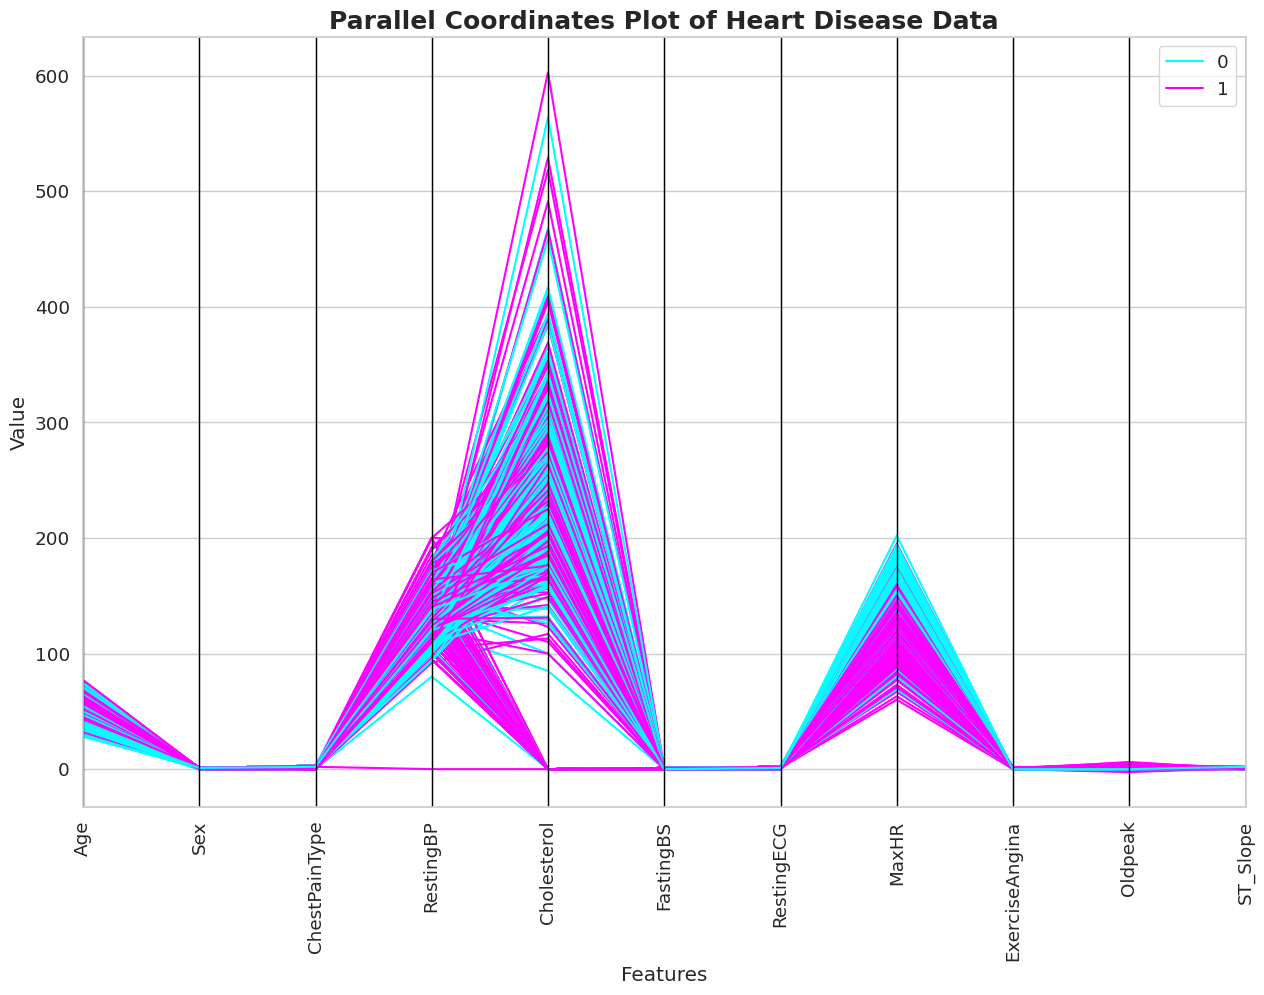

In [62]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(15, 10))
parallel_coordinates(df_transformed, class_column="HeartDisease", colormap="cool")
plt.title("Parallel Coordinates Plot of Heart Disease Data", fontsize=18, weight="bold")
plt.xlabel("Features")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

In [21]:
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

# Create a subplot with a specified number of rows and columns
fig = sp.make_subplots(rows=4, cols=3, subplot_titles=[f"Distribution of {col}" for col in df.columns])

# Define a color palette
colors = px.colors.qualitative.Plotly

# Loop through each column and create a histogram for each
for i, col in enumerate(df.columns):
    row = i // 3 + 1
    col_num = i % 3 + 1
    hist = px.histogram(df, x=col, nbins=30, marginal="violin", color_discrete_sequence=[colors[i % len(colors)]])
    for trace in hist.data:
        fig.add_trace(trace, row=row, col=col_num)

# Update layout for better spacing and aesthetics
fig.update_layout(
    height=1000,
    width=1500,
    title_text='Distribution of Data Columns',
    title_font=dict(size=24, family='Arial', color='darkblue'),
    showlegend=False,
    template='plotly_white',
    margin=dict(l=40, r=40, t=80, b=40),
)

# Update x-axis and y-axis labels for readability
fig.update_xaxes(title_font=dict(size=12, family='Arial', color='darkblue'), tickfont=dict(size=10, family='Arial', color='black'))
fig.update_yaxes(title_font=dict(size=12, family='Arial', color='darkblue'), tickfont=dict(size=10, family='Arial', color='black'))

fig.show()


Detecting Outliers

In [22]:

# Number of rows and columns for subplots
num_columns = df.shape[1]
num_rows = (num_columns // 3) + 1 if num_columns % 3 != 0 else num_columns // 3

# Create a subplot with the appropriate number of rows and columns
fig = sp.make_subplots(rows=num_rows, cols=3, subplot_titles=[f"Distribution of {col}" for col in df.columns])

# Loop through each column and create a box plot for each
for i, col in enumerate(df.columns):
    row = i // 3 + 1
    col_num = i % 3 + 1
    box = px.box(df, y=col, points="all")
    for trace in box.data:
        fig.add_trace(trace, row=row, col=col_num)

# Update layout for better spacing and aesthetics
fig.update_layout(
    height=num_rows * 400,
    width=1500,
    title_text='Distribution of Data Columns',
    title_font=dict(size=24, family='Arial', color='darkblue'),
    showlegend=False,
    template='plotly_white',
    margin=dict(l=40, r=40, t=80, b=40),
)

# Update y-axis labels for readability
fig.update_yaxes(title_font=dict(size=12, family='Arial', color='darkblue'), tickfont=dict(size=10, family='Arial', color='black'))

fig.show()


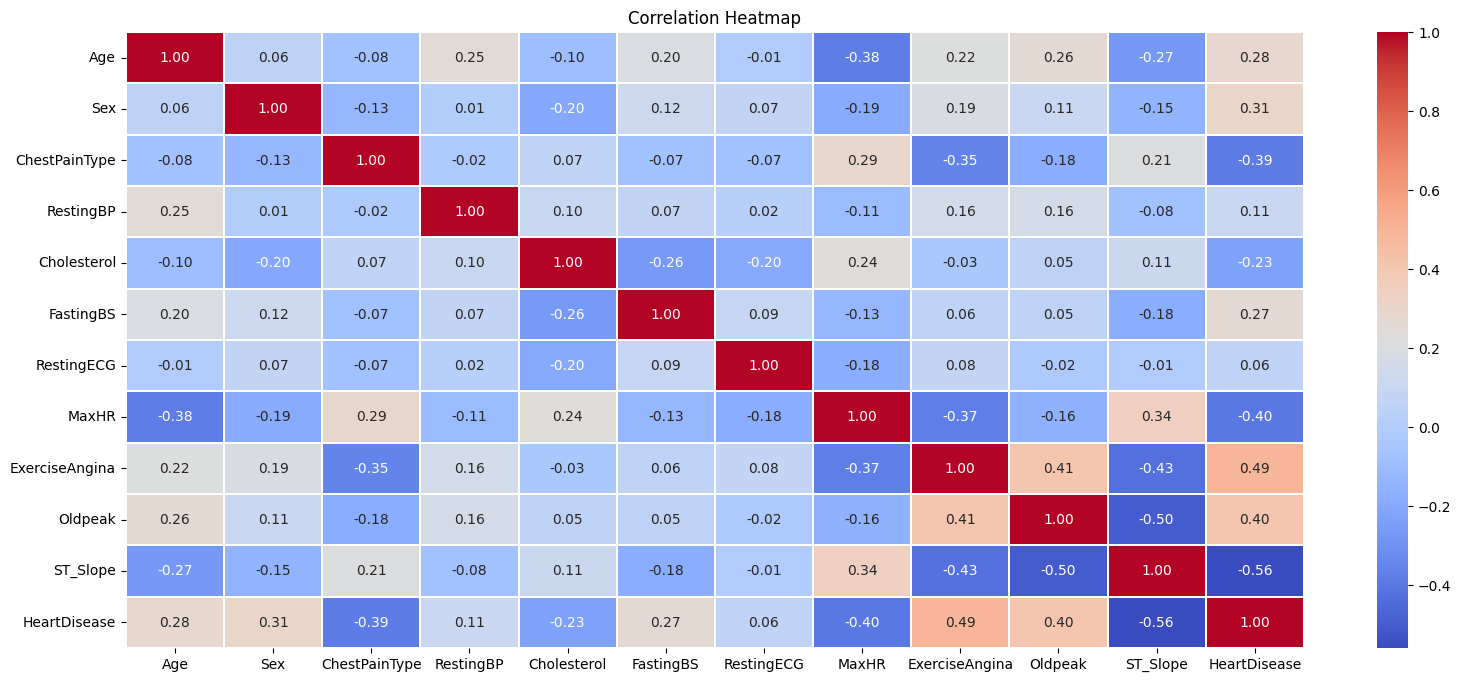

In [5]:
# Calculate the correlation matrix (Pearson correlation) between X and y
correlation_matrix = df_transformed.corr()

# Create a figure
plt.figure(figsize=(19, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.05)

# Add a title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

# Data Preperation

In [54]:
X = df_transformed.iloc[:,:-1].values
y=df_transformed.iloc[:,-1].values
# y = y.astype(bool)
# X = X.astype(int)

X

array([[40. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       [49. ,  0. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       ...,
       [57. ,  1. ,  0. , ...,  1. ,  1.2,  1. ],
       [57. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  2. , ...,  0. ,  0. ,  2. ]])

In [56]:
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MaxAbsScaler,RobustScaler
sc_X = StandardScaler()
X  = sc_X.fit_transform(X)
X

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

# Assuming you have a DataFrame 'df'
df_numeric = df_transformed.select_dtypes(include=['float64', 'int64'])  # Select numeric columns
last_col = df_numeric.iloc[:, -1]  # Store the last column

# Remove the last column from the numeric DataFrame
df_numeric = df_numeric.iloc[:, :-1]

# Create scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
maxabs_scaler = MaxAbsScaler()
robust_scaler = RobustScaler()

# Perform scaling on numeric columns (excluding the last column)
df_standard = pd.DataFrame(standard_scaler.fit_transform(df_numeric), columns=df_numeric.columns)
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_numeric), columns=df_numeric.columns)
df_maxabs = pd.DataFrame(maxabs_scaler.fit_transform(df_numeric), columns=df_numeric.columns)
df_robust = pd.DataFrame(robust_scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Append the original last column to the scaled DataFrames
df_standard = pd.concat([df_standard, last_col], axis=1)
df_minmax = pd.concat([df_minmax, last_col], axis=1)
df_maxabs = pd.concat([df_maxabs, last_col], axis=1)
df_robust = pd.concat([df_robust, last_col], axis=1)

# Combine scaled numeric columns with non-numeric columns (if any)
if df.shape[1] != df_numeric.shape[1] + 1:
    non_numeric_cols = [col for col in df.columns if col not in df_numeric.columns and col != last_col.name]
    df_standard = pd.concat([df_standard, df[non_numeric_cols]], axis=1)
    df_minmax = pd.concat([df_minmax, df[non_numeric_cols]], axis=1)
    df_maxabs = pd.concat([df_maxabs, df[non_numeric_cols]], axis=1)
    df_robust = pd.concat([df_robust, df[non_numeric_cols]], axis=1)

In [12]:
print("Standard Scaled Data")
df_standard.to_csv("Standard_Scaled_Heart.csv", index=False)
print("MinMax Scaled Data")
df_minmax.to_csv("MinMax_Scaled_Heart.csv", index=False)
print("MaxAbs Scaled Data")
df_maxabs.to_csv("MaxAbs_Scaled_Heart.csv", index=False)
print("Robust Scaled Data")
df_robust.to_csv("Robust_Scaled_Heart.csv", index=False)
print("Neumeric Transformed Data")
df_transformed.to_csv("Neumeric_Transformed_Heart.csv", index=False)

Standard Scaled Data
MinMax Scaled Data
MaxAbs Scaled Data
Robust Scaled Data
Neumeric Transformed Data


# Pycaret

In [3]:
import pycaret

In [30]:
from pycaret.classification import *

In [31]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [39]:
s = setup(
    df,
    target="HeartDisease",
    session_id=2,
    data_split_stratify=True,
    # normalize=True,
    experiment_name="The Benchmark",
)

,Description,Value
0,Session id,2
1,Target,HeartDisease
2,Target type,Binary
3,Original data shape,"(918, 12)"
4,Transformed data shape,"(918, 19)"
5,Transformed train set shape,"(642, 19)"
6,Transformed test set shape,"(276, 19)"
7,Numeric features,6
8,Categorical features,5
9,Preprocess,True


In [40]:
best_model = compare_models(sort = 'AUC')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:41:32
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8566,0.9234,0.8875,0.8609,0.8722,0.7090,0.7129,0.0640
lda,Linear Discriminant Analysis,0.8566,0.9227,0.8875,0.8609,0.8722,0.7090,0.7129,0.0600
lr,Logistic Regression,0.8551,0.9220,0.8817,0.8620,0.8701,0.7064,0.7098,0.1350
nb,Naive Bayes,0.8582,0.9149,0.8763,0.8707,0.8715,0.7133,0.7172,0.0580
rf,Random Forest Classifier,0.8551,0.9132,0.9017,0.8497,0.8717,0.7053,0.7143,0.1770
gbc,Gradient Boosting Classifier,0.8457,0.9128,0.8818,0.8491,0.8624,0.6869,0.6930,0.1430
et,Extra Trees Classifier,0.8488,0.9037,0.8874,0.8492,0.8657,0.6930,0.6985,0.1730
ada,Ada Boost Classifier,0.8520,0.8944,0.8651,0.8692,0.8648,0.7013,0.7056,0.1210
svm,SVM - Linear Kernel,0.6731,0.8210,0.6899,0.8040,0.6604,0.3401,0.3915,0.0540
dt,Decision Tree Classifier,0.7818,0.7789,0.8113,0.8026,0.8036,0.5582,0.5634,0.0550


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

KeyboardInterrupt: 